In [75]:
import json
import seaborn as sns
from os.path import exists
import pandas as pd

In [76]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,12

In [77]:
MODELS = [
    "text-davinci-002",
    "text-curie-001",
    "text-babbage-001",
    "bigscience/bloom",
    "EleutherAI/gpt-j-6B",
    "gpt-neox-20b",
    "facebook/opt-13b",
    "facebook/opt-30b",
    "co:here",
    "jurassic1-jumbo",
    "ul2",
    "google/flan-t5-xxl"
]

prompts = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "bloom1",
    "bloom2",
    "bloom3",
    "bloom4",
    "bloom5"
]

n_shots = [1,3,5,10]

In [90]:
log_data = []
for model in MODELS:
    for prompt in prompts:
        for n_shot in n_shots:
            prompt_name = prompt
            model_name = model.replace('/', '-')
            log_file = f"../llm_logs/classification-{model_name}-{prompt_name}-{n_shot}.json"
            if exists(log_file):
                with open(log_file) as f:
                    data = json.load(f)
                prompt_name = prompt_name.replace("bloom", "prompt_source")
                log_data.append({
                    "model": model,
                    "prompt": prompt_name,
                    "n_shot": n_shot,
                    "precision": data['metrics']['p'],
                    "f1": data['metrics']['f1']
                })


In [101]:
model_map = [
    ("text-davinci-002","GPT3-davinci"),
    ("text-curie-001","GPT3-curie"),
    ("text-babbage-001","GPT3-babbage"),
    ("bigscience/bloom","BLOOM"),
    ("EleutherAI/gpt-j-6B","GPT-J-6B"),
    ("gpt-neox-20b","GPT-NeoX-20B"),
    ("facebook/opt-13b","OPT-13B"),
    ("facebook/opt-30b","OPT-30B"),
    ("co:here","Co:here"),
    ("jurassic1-jumbo","Jurassic-1 Jumbo"),
    ("ul2","UL2"),
    ("google/flan-t5-xxl","Flan-T5-xxl")
]
for m in model_map:
    for l in log_data:
        if l['model'] == m[0]:
            l['model'] = m[1]

In [102]:
df = pd.DataFrame(log_data)

In [17]:
df.to_csv("classification.csv")

In [18]:
#df.loc[df['n_shot']==3]rse-grained types, 66 fine-grained types, 188,200 sentences, 491,711 entities, and 4,601,223 tokens. Three benchmark tasks are built, one is supervised (Few-NERD (SU

In [19]:
#sns.barplot(data=df.loc[df['model'].isin(["text-davinci-002", "bigscience/bloom", "co:here", "jurassic1-jumbo"])], x="model", y="f1", hue="prompt")

In [31]:
pallete = ["#5cff85", "#ceffda", "#a5dcd6", "#4d7871", "#1d1929"]
pallete = ["#5cff85", "#6dc6ff", "#4455f0", "#ef5151", "#ffbd3e"]
pallete = ["#5cff85", "#52dfcd", "#6dc6ff", "#4c6ada", "#3849e0", "#7f38e0",
           "#c254dd", "#ef5151", "#a22f2f", "#ffbd3e", "#e5e72c", "#94ea40"]

In [35]:
#sns.set_palette(sns.color_palette(pallete))

pallete = ["#5cff85", "#6dc6ff", "#4455f0", "#ef5151", "#ffbd3e"]
customPalette = sns.set_palette(sns.color_palette(pallete))

<AxesSubplot:xlabel='model', ylabel='f1'>

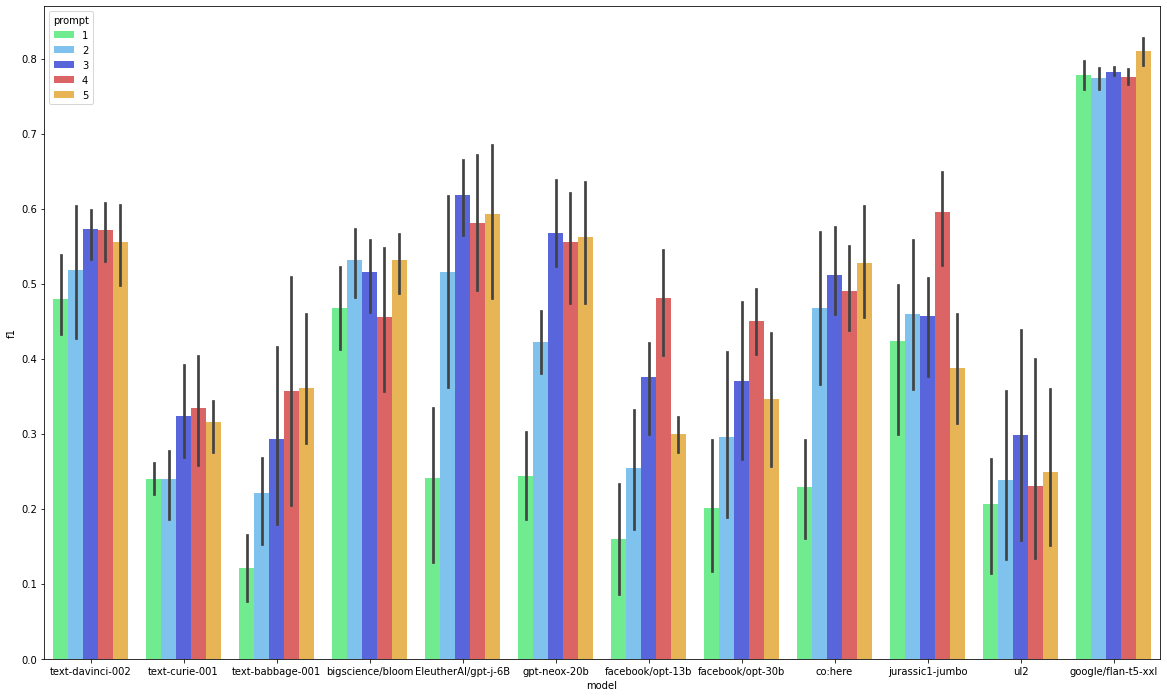

In [36]:
sns.barplot(data=df.loc[df['prompt'].isin(["1","2","3","4","5"])], x="model", y="f1", hue="prompt", palette=customPalette)

In [103]:

pallete = ["#5cff85", "#52dfcd", "#6dc6ff", "#4c6ada", "#3849e0", "#7f38e0",
           "#c254dd", "#ef5151", "#a22f2f", "#ffbd3e", "#e5e72c", "#94ea40"]
customPalette = sns.set_palette(sns.color_palette(pallete))

In [104]:

rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 200

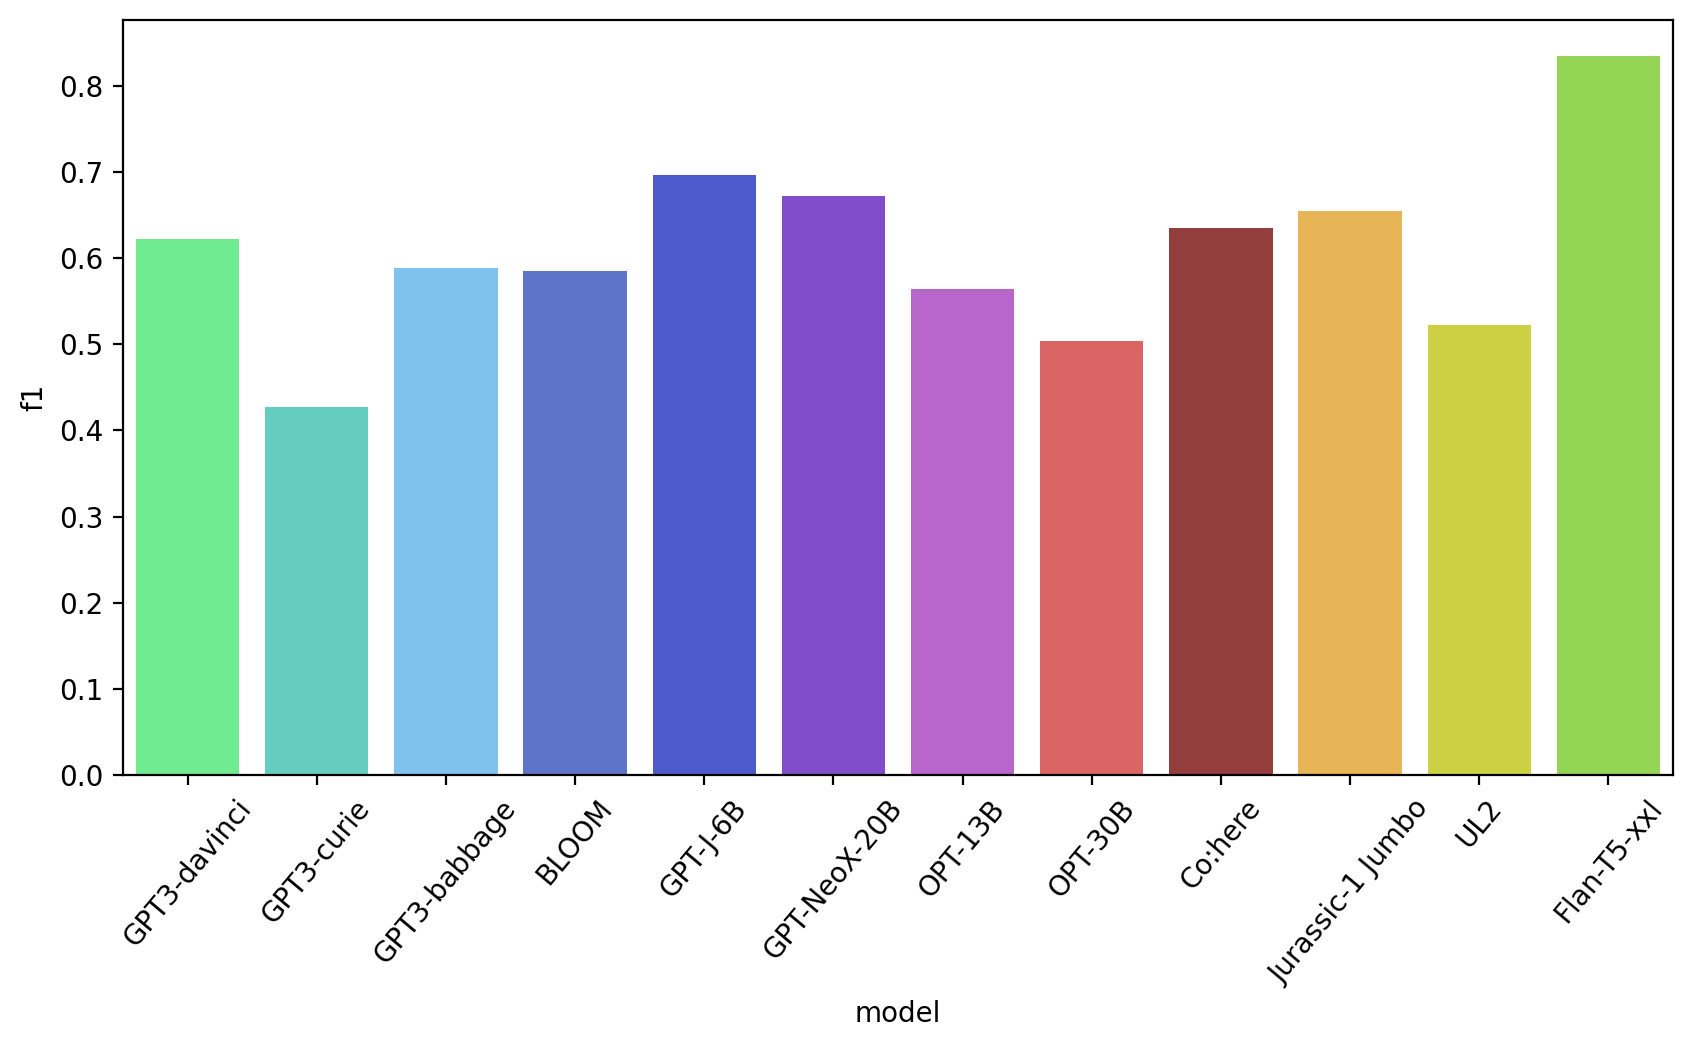

In [105]:
df2 = df.loc[df['prompt'].isin(["1","2","3","4","5"])]
idx = df2.groupby(['model'])['f1'].transform(max) == df2['f1']
ax = sns.barplot(data=df2[idx], x="model", y="f1", palette=customPalette)
ax.tick_params(axis='x', rotation=50)

In [63]:
df2.groupby(['model', 'prompt'])['f1'].transform(max) == df2['f1']

0      False
1      False
2      False
3       True
4      False
       ...  
434     True
435     True
436    False
437    False
438    False
Name: f1, Length: 140, dtype: bool

In [72]:
model_map = [
    ("text-davinci-002","GPT3-davinci"),
    ("text-curie-001","GPT3-curie"),
    ("text-babbage-001","GPT3-babbage"),
    ("bigscience/bloom","BLOOM"),
    ("EleutherAI/gpt-j-6B","GPT-J-6B"),
    ("gpt-neox-20b","GPT-NeoX-20B"),
    ("facebook/opt-13b","OPT-13B"),
    ("facebook/opt-30b","OPT-30B"),
    ("co:here","Co:here"),
    ("jurassic1-jumbo","Jurassic-1 Jumbo"),
    ("ul2","UL2"),
    ("google/flan-t5-xxl","Flan-T5-xxl")
]

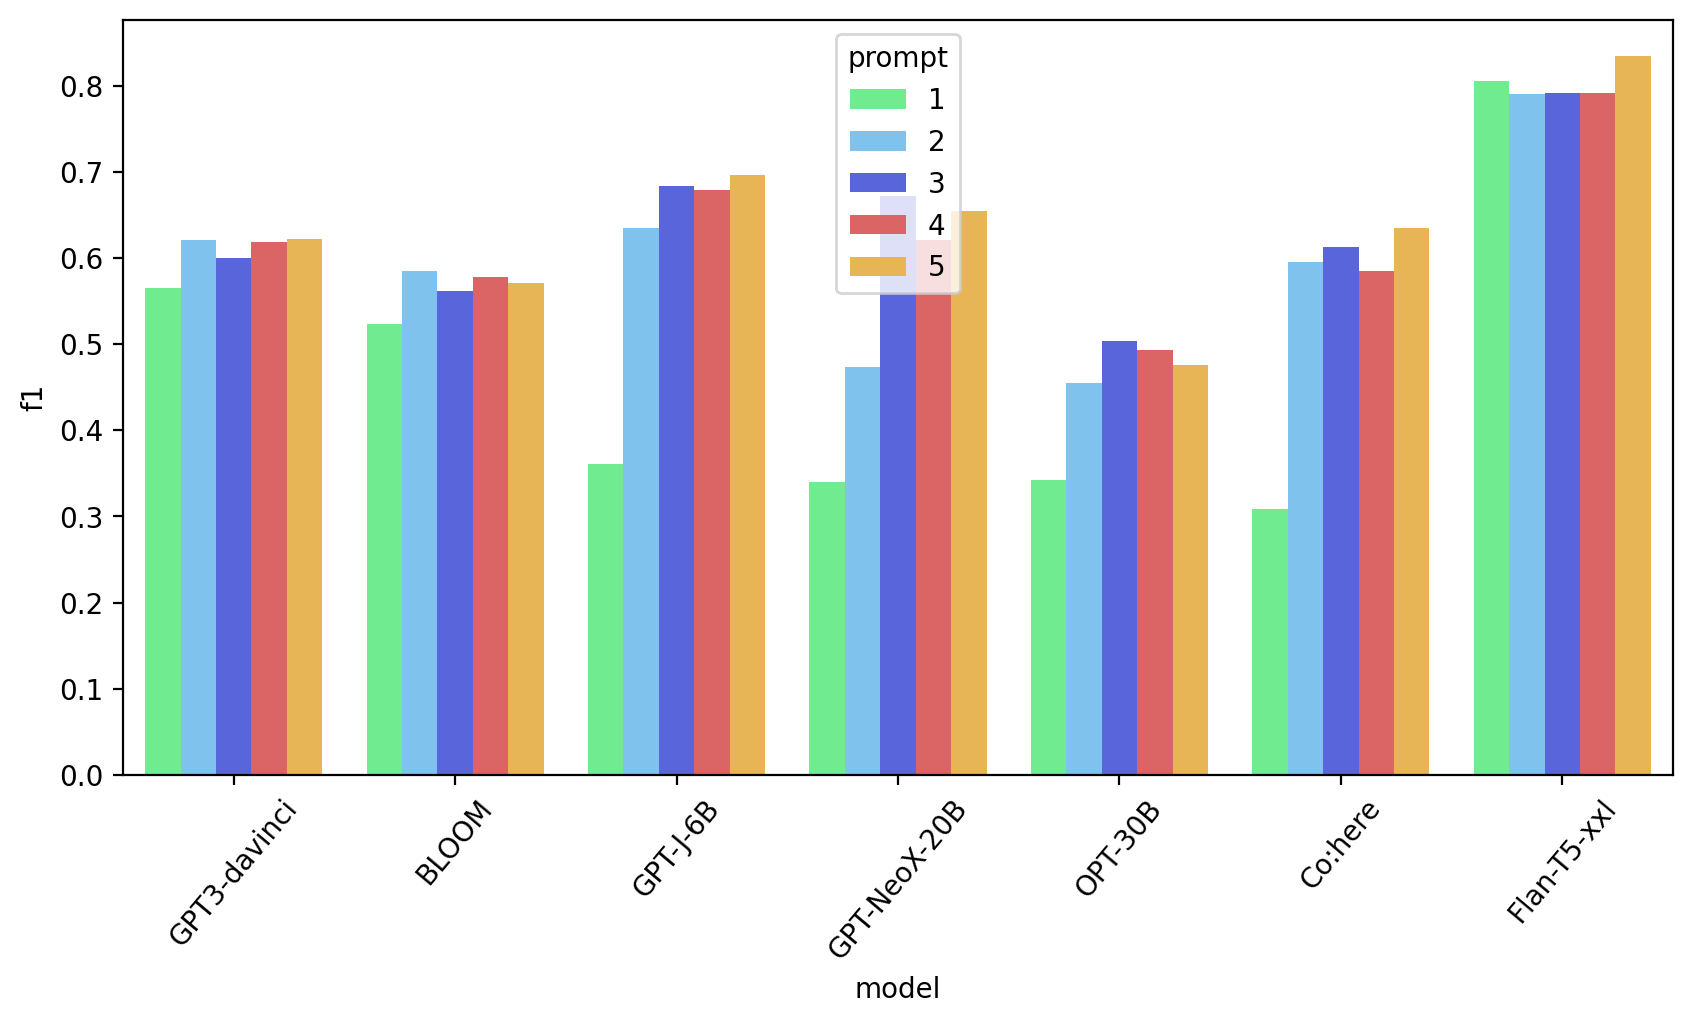

In [107]:
pallete = ["#5cff85", "#6dc6ff", "#4455f0", "#ef5151", "#ffbd3e"]
customPalette = sns.set_palette(sns.color_palette(pallete))
df2 = df.loc[df['model'].isin(["GPT3-davinci", "BLOOM", "GPT-J-6B", "GPT-NeoX-20B",
                               "OPT-30B", "Co:here", "Flan-T5-xxl"])]
df2 = df2.loc[df2['prompt'].isin(["1","2","3","4","5"])]
idx = df2.groupby(['model', 'prompt'])['f1'].transform(max) == df2['f1']
ax = sns.barplot(data=df2[idx], x="model", y="f1", hue="prompt", palette=customPalette)
ax.tick_params(axis='x', rotation=50)

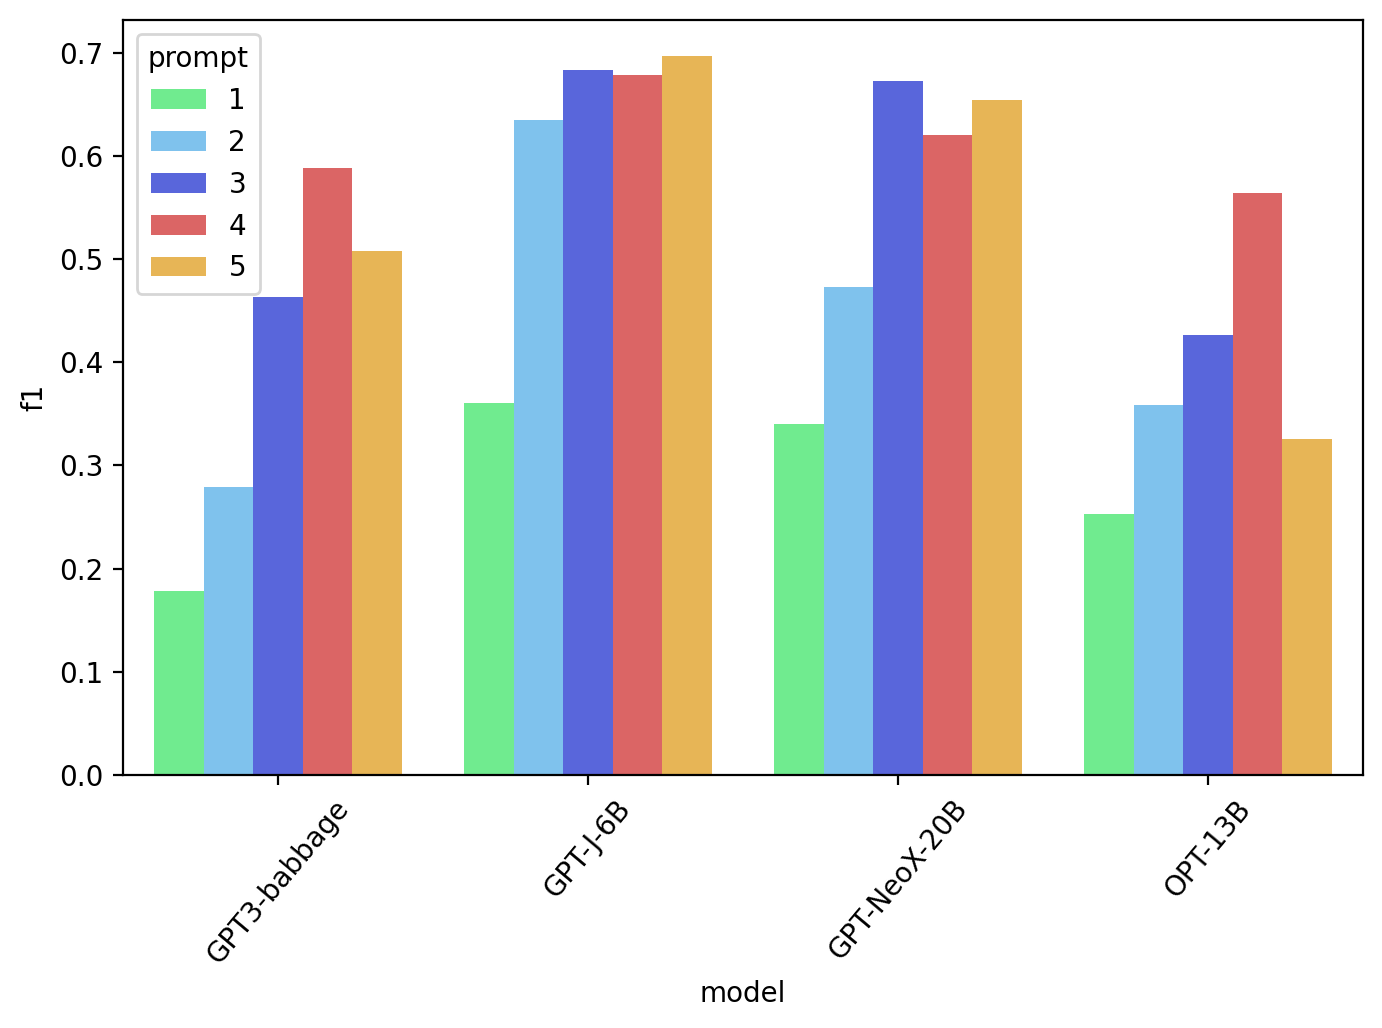

In [114]:
rcParams['figure.figsize'] = 8,5
rcParams['figure.dpi'] = 200

pallete = ["#5cff85", "#6dc6ff", "#4455f0", "#ef5151", "#ffbd3e"]
customPalette = sns.set_palette(sns.color_palette(pallete))
df2 = df.loc[df['model'].isin(["GPT3-babbage", "GPT-J-6B", "GPT-NeoX-20B","OPT-13B"])]
df2 = df2.loc[df2['prompt'].isin(["1","2","3","4","5"])]
idx = df2.groupby(['model', 'prompt'])['f1'].transform(max) == df2['f1']
ax = sns.barplot(data=df2[idx], x="model", y="f1", hue="prompt", palette=customPalette)
ax.tick_params(axis='x', rotation=50)

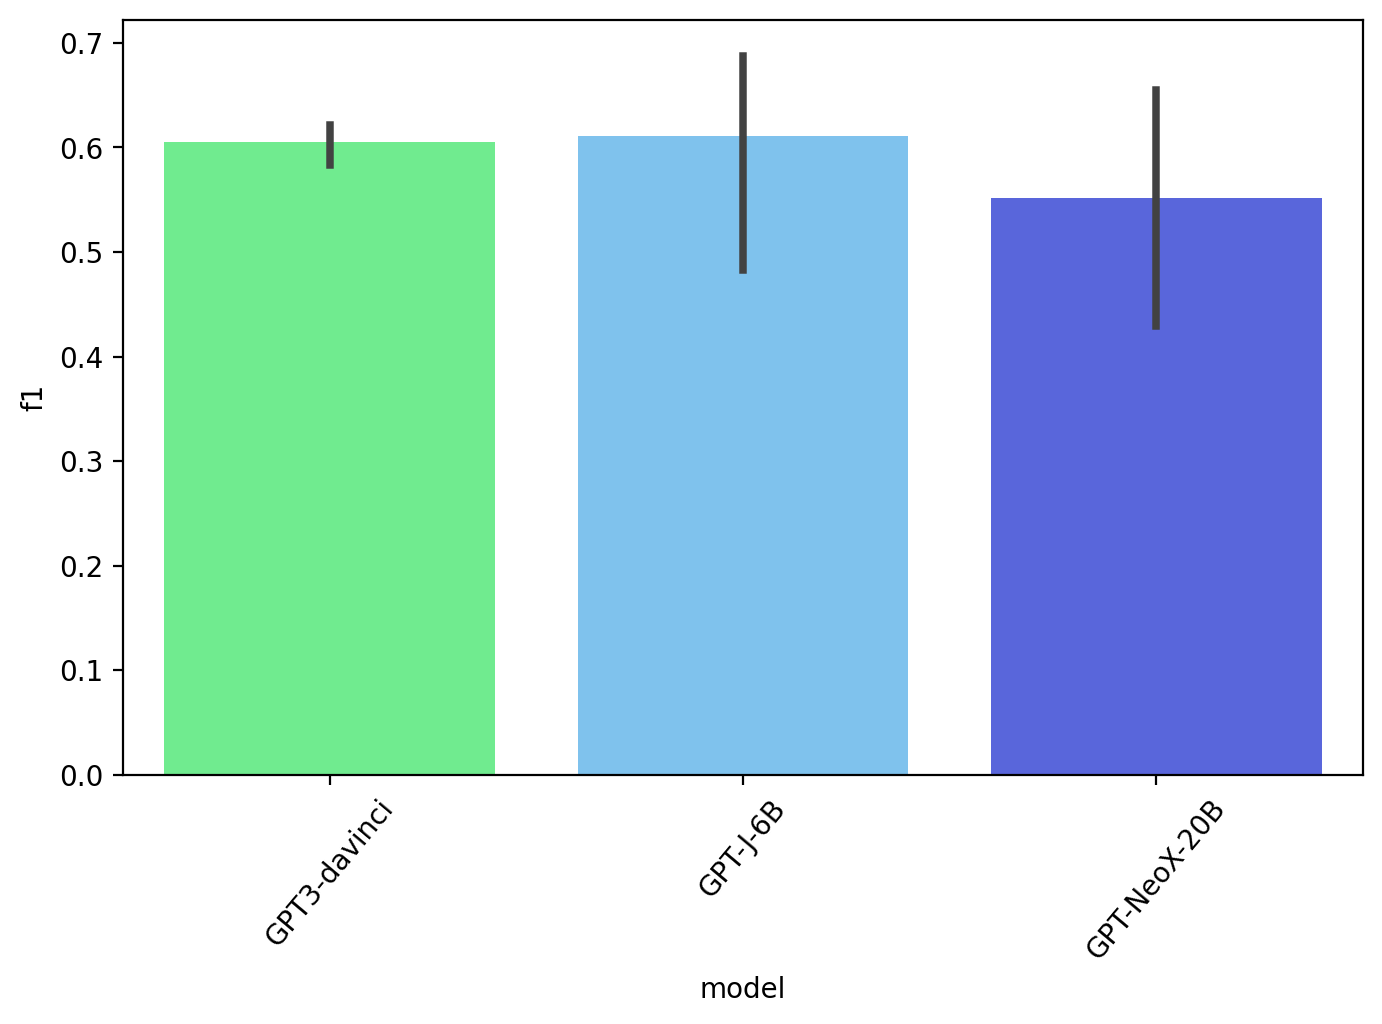

In [117]:
rcParams['figure.figsize'] = 8,5
rcParams['figure.dpi'] = 200

pallete = ["#5cff85", "#6dc6ff", "#4455f0", "#ef5151", "#ffbd3e"]
customPalette = sns.set_palette(sns.color_palette(pallete))
df2 = df.loc[df['model'].isin(["GPT3-davinci", "GPT-J-6B", "GPT-NeoX-20B"])]
df2 = df2.loc[df2['prompt'].isin(["1","2","3","4","5"])]
idx = df2.groupby(['model', 'prompt'])['f1'].transform(max) == df2['f1']
ax = sns.barplot(data=df2[idx], x="model", y="f1", palette=customPalette)
ax.tick_params(axis='x', rotation=50)

/tmp/ipykernel_19351/660255908.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prompt_type'] = df2['prompt']
/home/daniel/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_19351/660255908.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

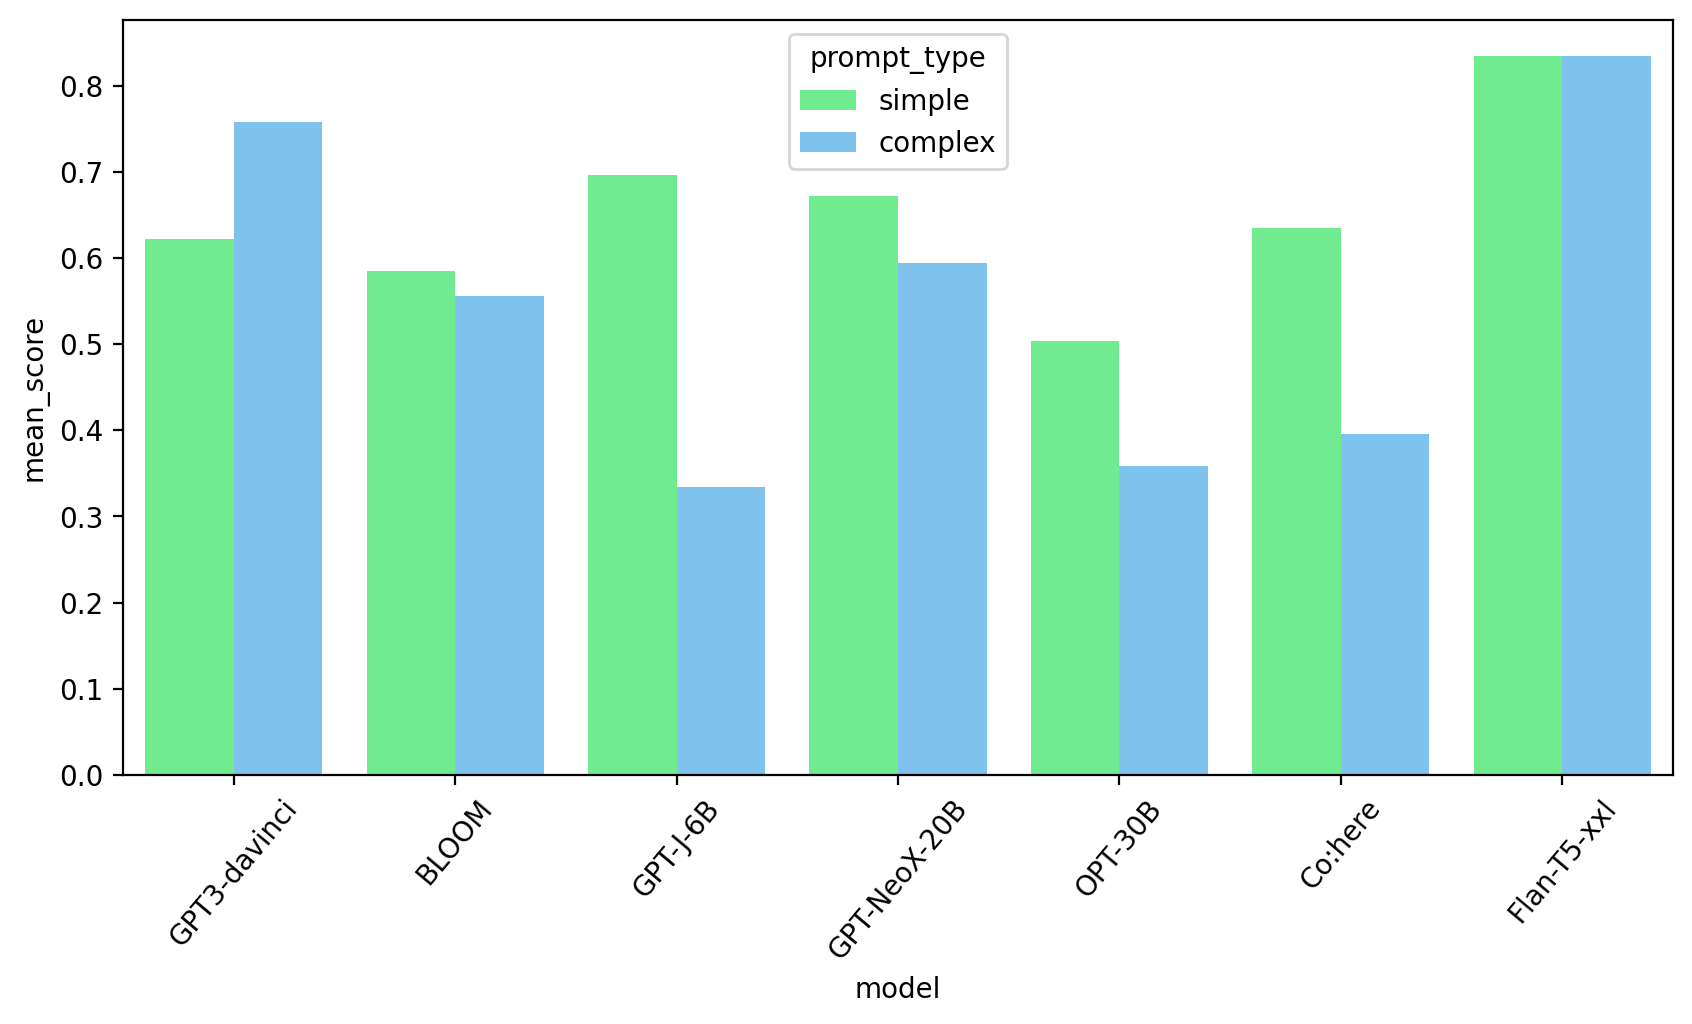

In [127]:

#rcParams['figure.figsize'] = 13,7
model_map = [
    ("text-davinci-002","GPT3-davinci"),
    ("text-curie-001","GPT3-curie"),
    ("text-babbage-001","GPT3-babbage"),
    ("bigscience/bloom","BLOOM"),
    ("EleutherAI/gpt-j-6B","GPT-J-6B"),
    ("gpt-neox-20b","GPT-NeoX-20B"),
    ("facebook/opt-13b","OPT-13B"),
    ("facebook/opt-30b","OPT-30B"),
    ("co:here","Co:here"),
    ("jurassic1-jumbo","Jurassic-1 Jumbo"),
    ("ul2","UL2"),
    ("google/flan-t5-xxl","Flan-T5-xxl")
]
rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 200
#pallete = ["#5cff85", "#5cff85", "#5cff85", "#5cff85", "#5cff85", 
#           "#1d1929", "#1d1929", "#1d1929", "#1d1929", "#1d1929"]
pallete = ["#5cff85", "#5cff85", "#5cff85", "#5cff85", "#5cff85", 
           "#6dc6ff", "#6dc6ff", "#6dc6ff", "#6dc6ff", "#6dc6ff"]
customPalette = sns.set_palette(sns.color_palette(pallete))
pallete = ["#5cff85", "#6dc6ff"]
customPalette = sns.set_palette(sns.color_palette(pallete))
df2 = df.loc[df['model'].isin(["GPT3-davinci", "BLOOM", "GPT-J-6B", "GPT-NeoX-20B",
                               "OPT-30B", "Co:here", "Flan-T5-xxl"])]

import numpy as np

#df2 = df2.loc[df2['prompt'].isin(["1","2","3","4","5"])]
#idx = df2.groupby(['model', 'prompt'])['f1'].transform(max) == df2['f1']
df2['prompt_type'] = df2['prompt']
df2.loc[df2['prompt'].isin(["1","2","3","4","5"]), 'prompt_type'] = "simple"
df2.loc[df2['prompt'].isin(["prompt_source1","prompt_source2","prompt_source3","prompt_source4","prompt_source5"]), 'prompt_type'] = "complex"

df2['mean_score'] = df2.groupby(['model', 'prompt_type'])['f1'].transform(max)
#idx = df2.groupby(['model', 'prompt'])['f1'].transform(max) == df2['f1']
ax = sns.barplot(data=df2, x="model", y="mean_score", hue="prompt_type", palette=customPalette)
ax.tick_params(axis='x', rotation=50)

In [66]:
df.loc[df['model'] == "text-davinci-002"]

,model,prompt,n_shot,precision,f1
0,text-davinci-002,1,1,0.493561,0.478217
1,text-davinci-002,1,3,0.488457,0.458027
2,text-davinci-002,1,5,0.468983,0.418227
3,text-davinci-002,1,10,0.599955,0.564580
4,text-davinci-002,2,1,0.605525,0.585452
5,text-davinci-002,2,3,0.513001,0.490630
6,text-davinci-002,2,5,0.407086,0.375697
7,text-davinci-002,2,10,0.667370,0.621151
8,text-davinci-002,3,1,0.614808,0.595877
9,text-davinci-002,3,3,0.620059,0.585597


<AxesSubplot:xlabel='model', ylabel='f1'>

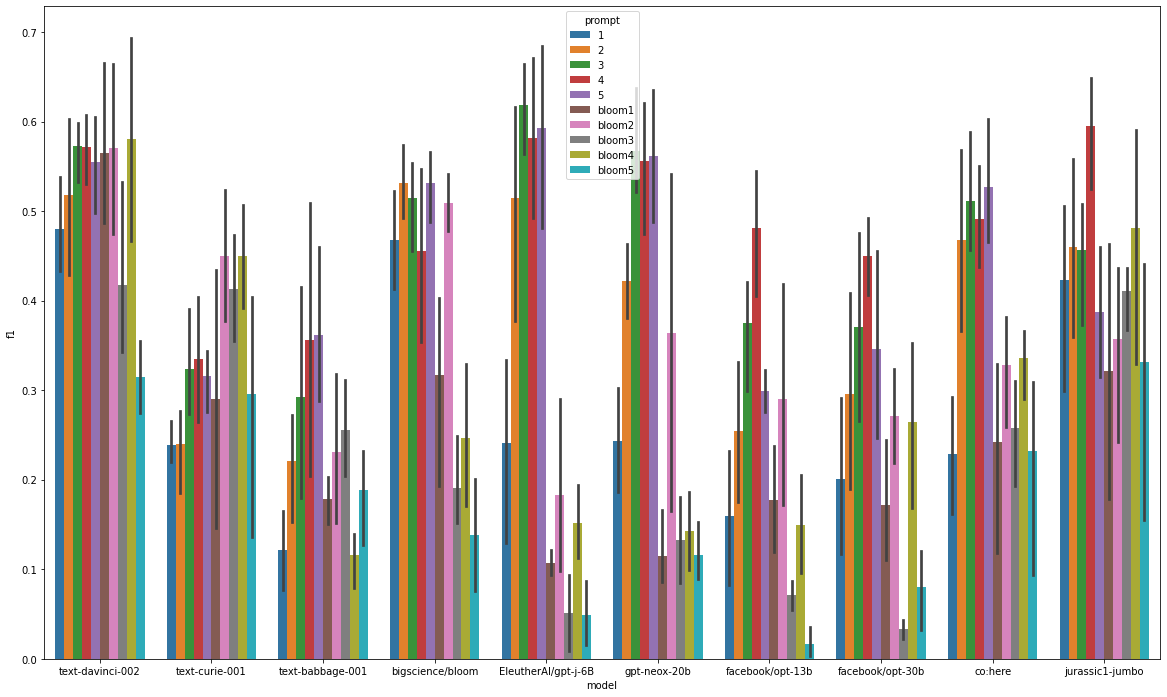

In [57]:
sns.barplot(data=df.loc[df['model']!="ul2"], x="model", y="f1", hue="prompt")

In [49]:
df = df.loc[df['model'].isin(["text-davinci-002", "EleutherAI/gpt-j-6B"])]

In [50]:
df = df.loc[df['prompt'].isin(["1","2","3","4","5"])]

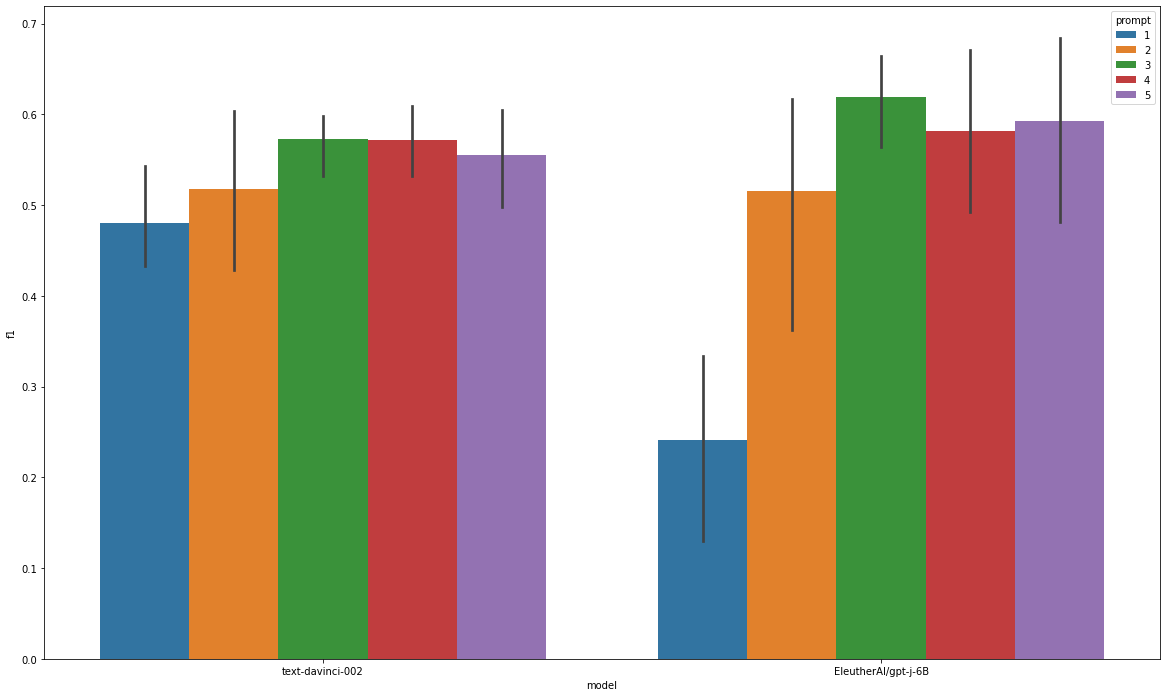

In [51]:
ax = sns.barplot(data=df, x="model", y="f1", hue="prompt")
#ax.set(ylim=(0.0, 0.7))

[(0.0, 0.7)]

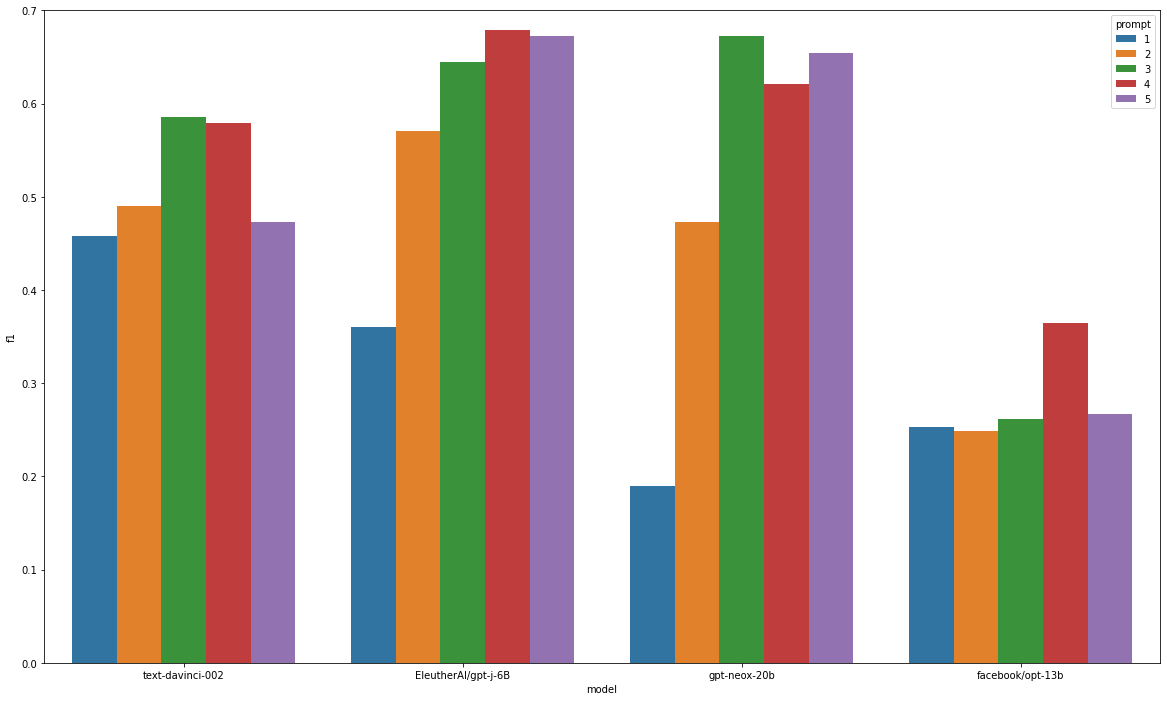

In [19]:
ax = sns.barplot(data=df.loc[df['n_shot']==3], x="model", y="f1", hue="prompt")
ax.set(ylim=(0.0, 0.7))

[(0.0, 0.7)]

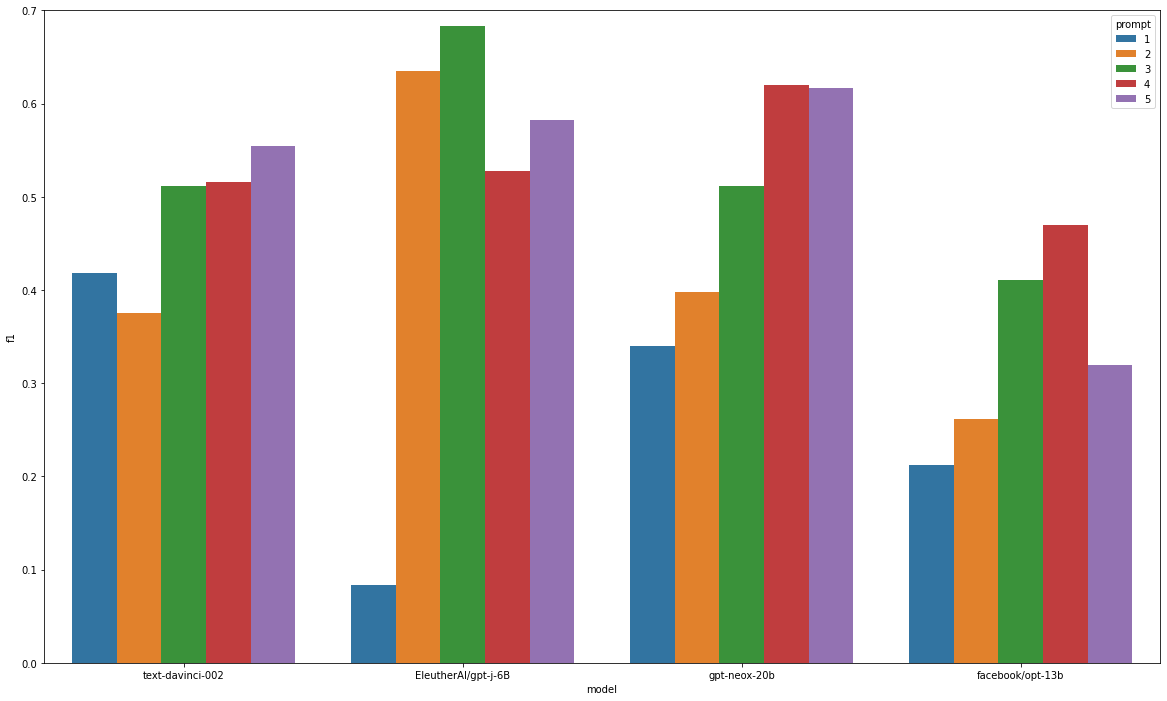

In [20]:
ax = sns.barplot(data=df.loc[df['n_shot']==5], x="model", y="f1", hue="prompt")
ax.set(ylim=(0.0, 0.7))

[(0.0, 0.7)]

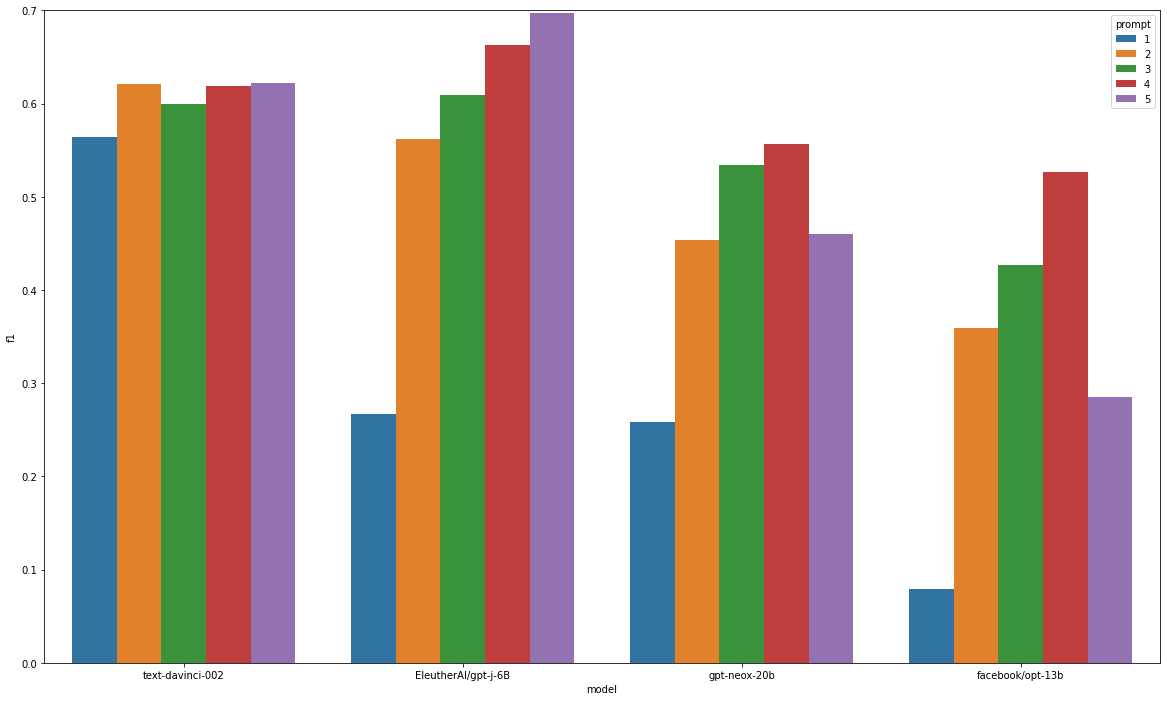

In [21]:
ax = sns.barplot(data=df.loc[df['n_shot']==10], x="model", y="f1", hue="prompt")
ax.set(ylim=(0.0, 0.7))

In [85]:
sns.set(rc={'figure.facecolor':'white'})

<AxesSubplot:xlabel='model', ylabel='f1'>

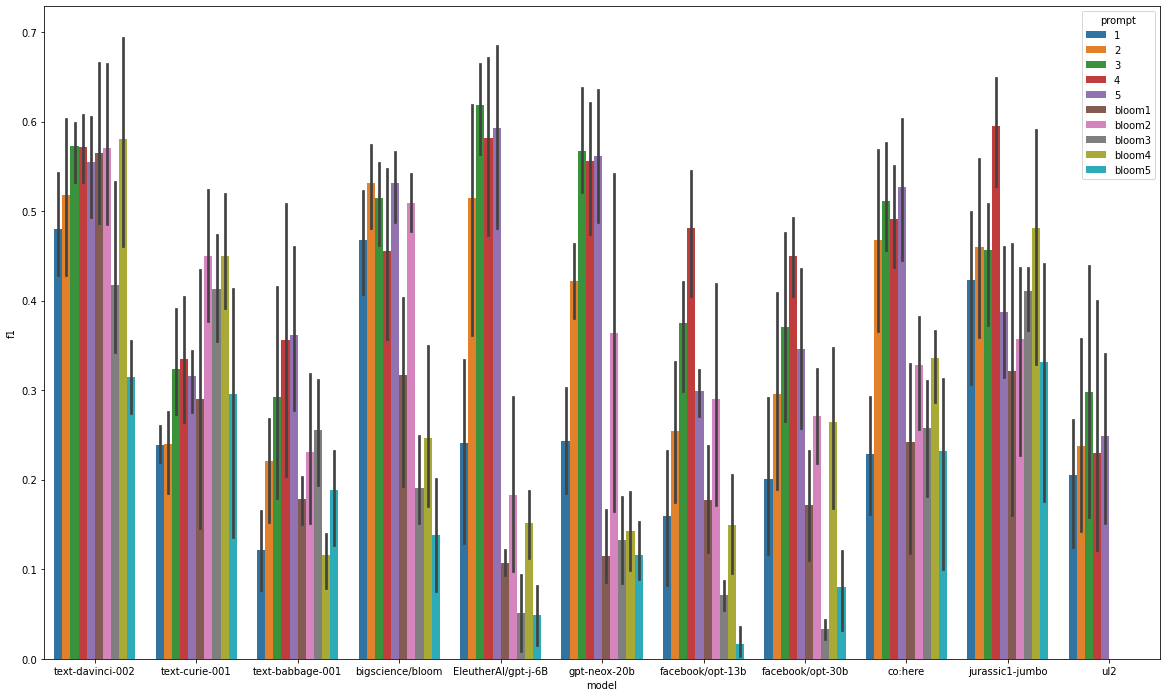

In [24]:
sns.barplot(data=df, x="model", y="f1", hue="prompt")

<AxesSubplot:xlabel='n_shot', ylabel='f1'>

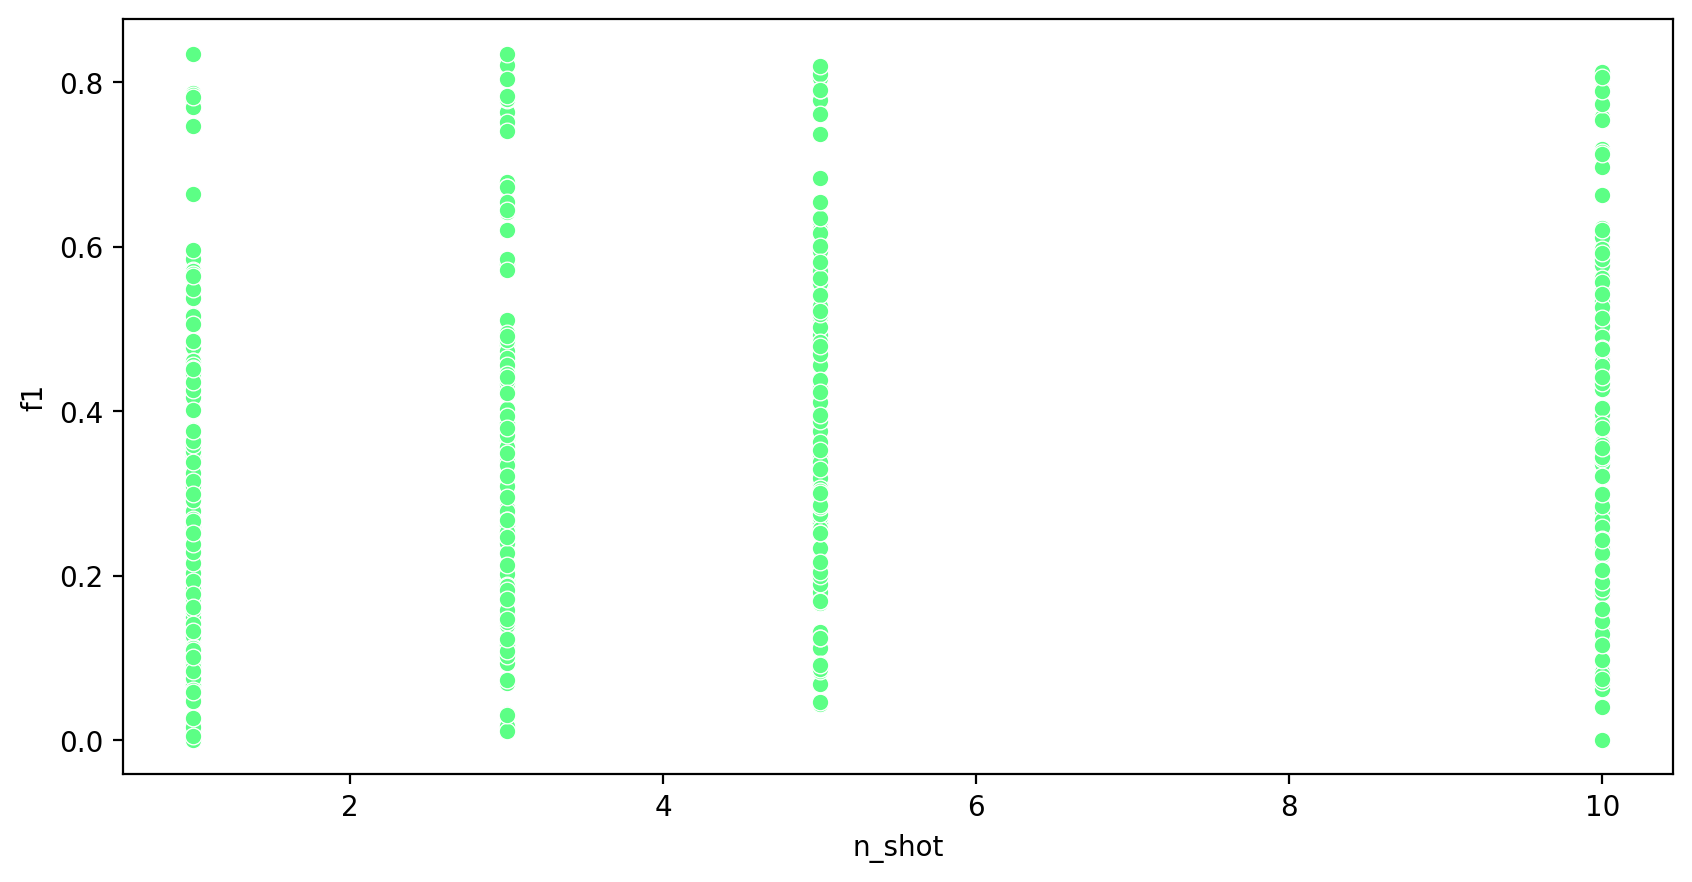

In [131]:
sns.scatterplot(data=df, x="n_shot", y="f1")

In [85]:
max_per_model = {}
for l in log_data:
    if l['model'] in max_per_model:
        if l['f1'] > max_per_model[l['model']]['f1']:
            max_per_model[l['model']]["f1"] = l['f1']
            max_per_model[l['model']]["n_shot"] = l['n_shot']
    else:
        max_per_model[l['model']] = {"f1": l['f1'], "n_shot": l['n_shot']}
        
max_per_model

{'text-davinci-002': {'f1': 0.758084914182475, 'n_shot': 10},
 'text-curie-001': {'f1': 0.5658632978198679, 'n_shot': 5},
 'text-babbage-001': {'f1': 0.5881588999236058, 'n_shot': 10},
 'bigscience/bloom': {'f1': 0.5853307350126015, 'n_shot': 3},
 'EleutherAI/gpt-j-6B': {'f1': 0.6967836257309941, 'n_shot': 10},
 'gpt-neox-20b': {'f1': 0.6723232323232323, 'n_shot': 3},
 'facebook/opt-13b': {'f1': 0.563944055944056, 'n_shot': 1},
 'facebook/opt-30b': {'f1': 0.503725343320849, 'n_shot': 10},
 'co:here': {'f1': 0.6351474256737415, 'n_shot': 5},
 'jurassic1-jumbo': {'f1': 0.6543440378391835, 'n_shot': 5},
 'ul2': {'f1': 0.5218096809680968, 'n_shot': 5},
 'google/flan-t5-xxl': {'f1': 0.8347034171502258, 'n_shot': 3}}

In [135]:
nshot_df = pd.DataFrame([{"model": key, "n_shot": val['n_shot']} for key,val in max_per_model.items()])

In [129]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='n_shot'>

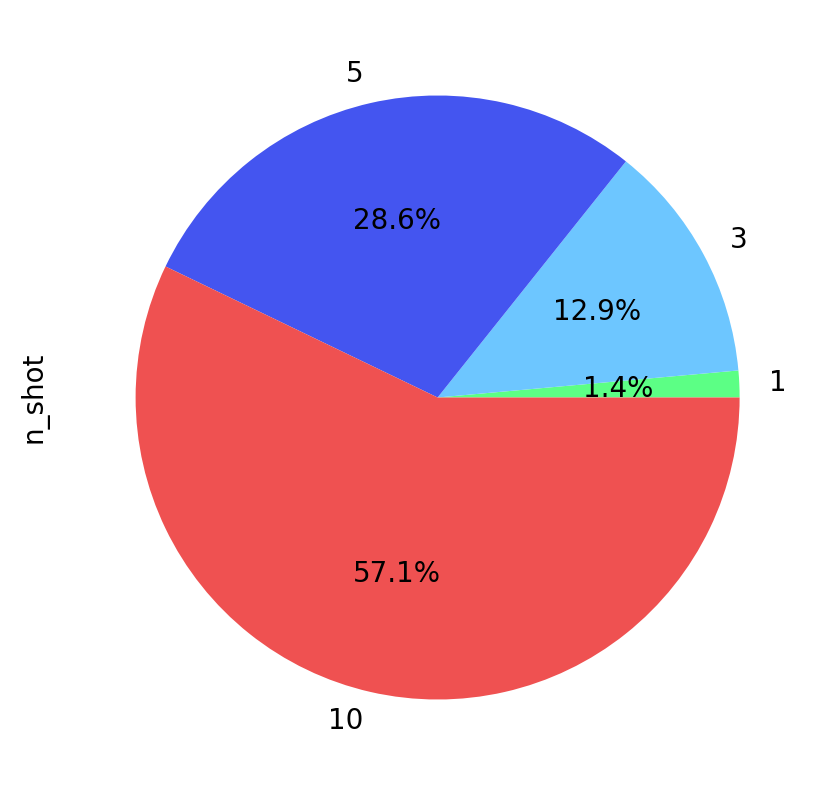

In [143]:

pallete = ["#5cff85", "#6dc6ff", "#4455f0", "#ef5151", "#ffbd3e"]
customPalette = sns.set_palette(sns.color_palette(pallete))
data = nshot_df.groupby("n_shot")['n_shot'].sum()
data.plot.pie(autopct="%.1f%%")

In [ ]:
data = [val['n_shot'] for key,val in max_per_model.items()]
keys = []

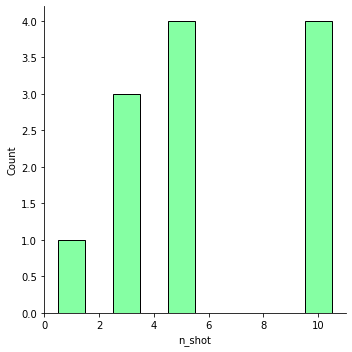

In [89]:
sns.displot(data=df, x="n_shot", discrete=True)

<AxesSubplot: xlabel='model', ylabel='f1'>

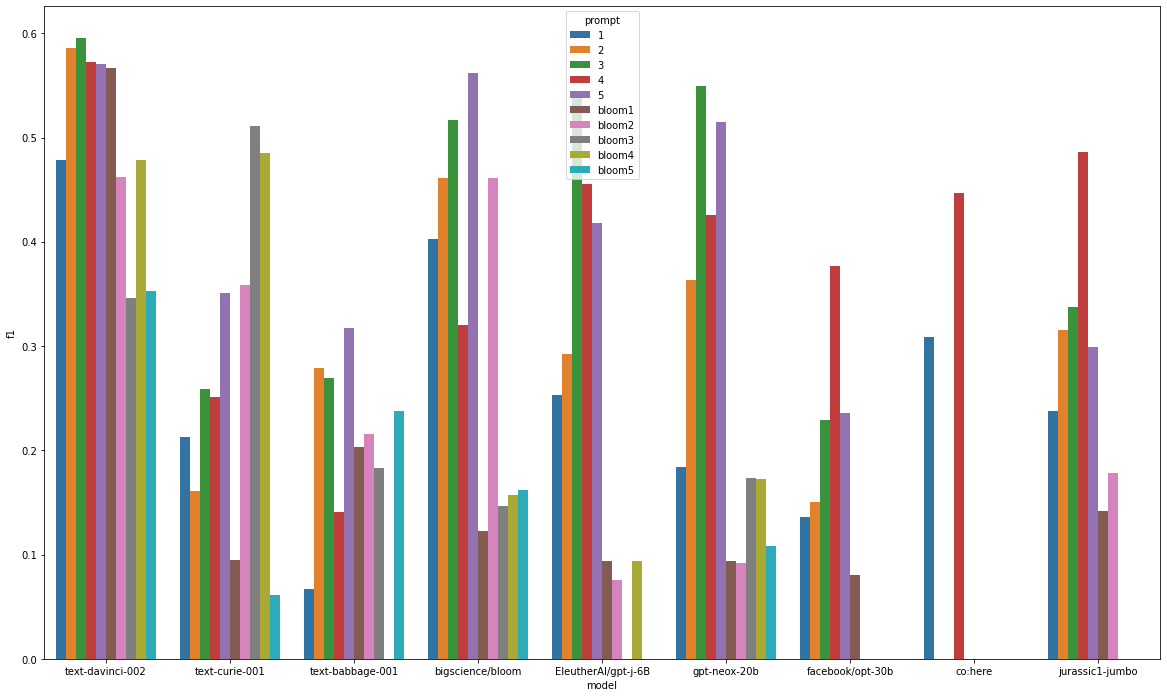

In [133]:
sns.barplot(data=df.loc[df['n_shot']==1], x="model", y="f1", hue="prompt")

<AxesSubplot: xlabel='model', ylabel='f1'>

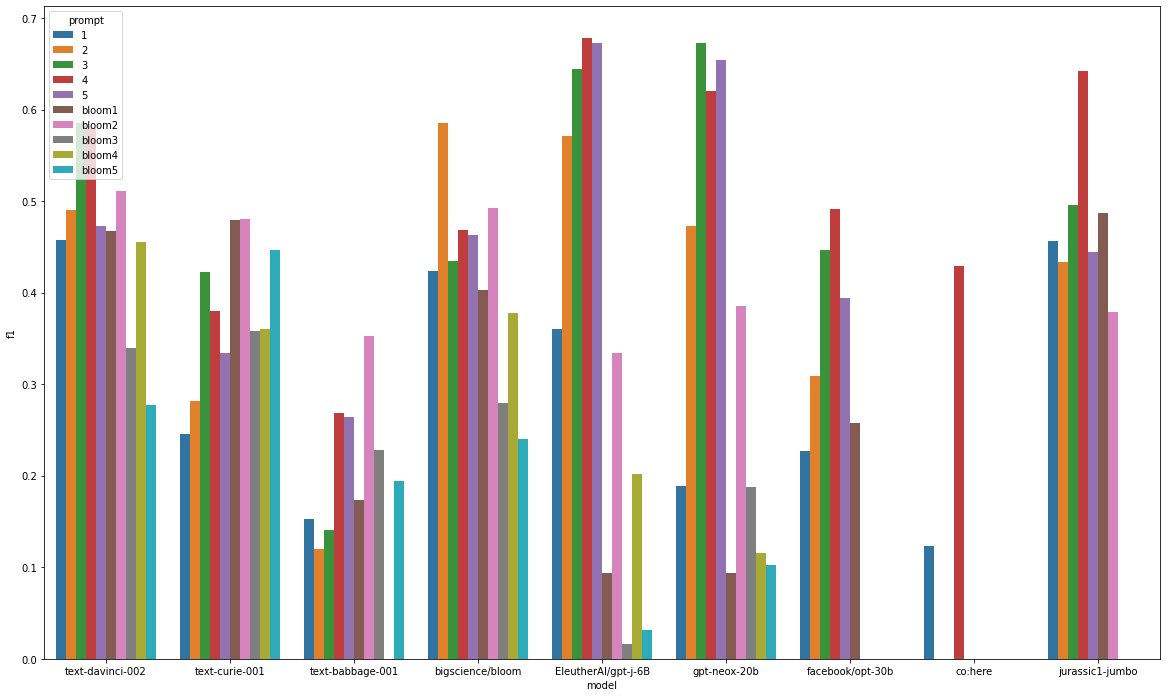

In [134]:
sns.barplot(data=df.loc[df['n_shot']==3], x="model", y="f1", hue="prompt")

<AxesSubplot: xlabel='model', ylabel='f1'>

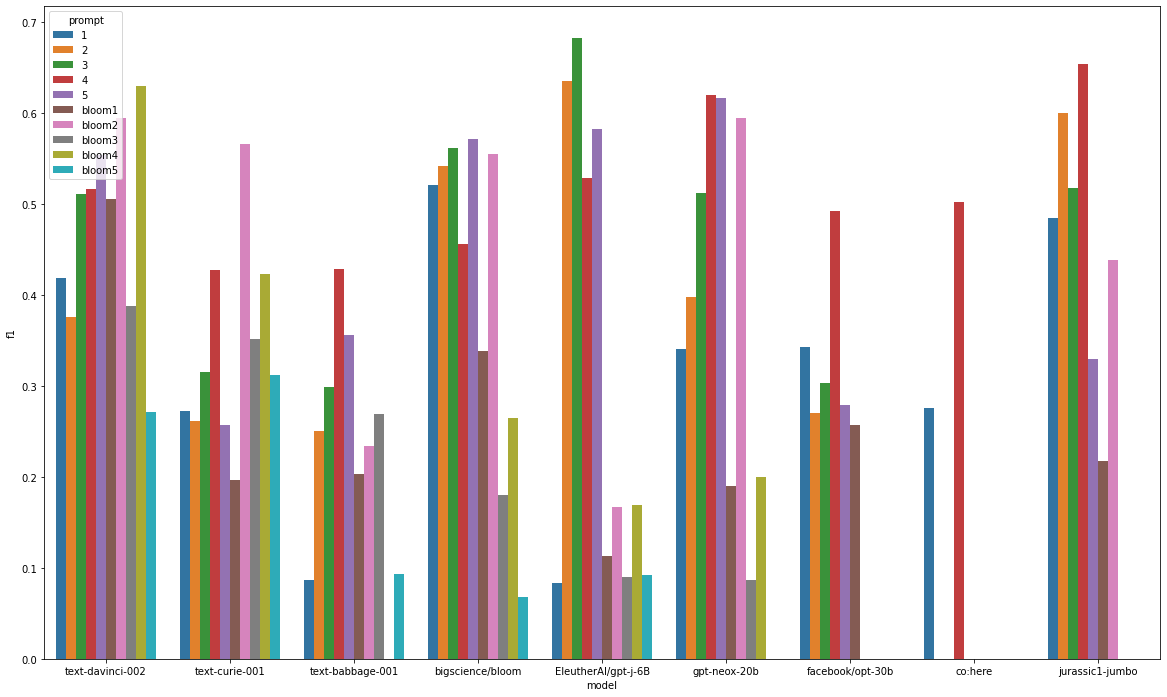

In [135]:
sns.barplot(data=df.loc[df['n_shot']==5], x="model", y="f1", hue="prompt")

<AxesSubplot: xlabel='model', ylabel='f1'>

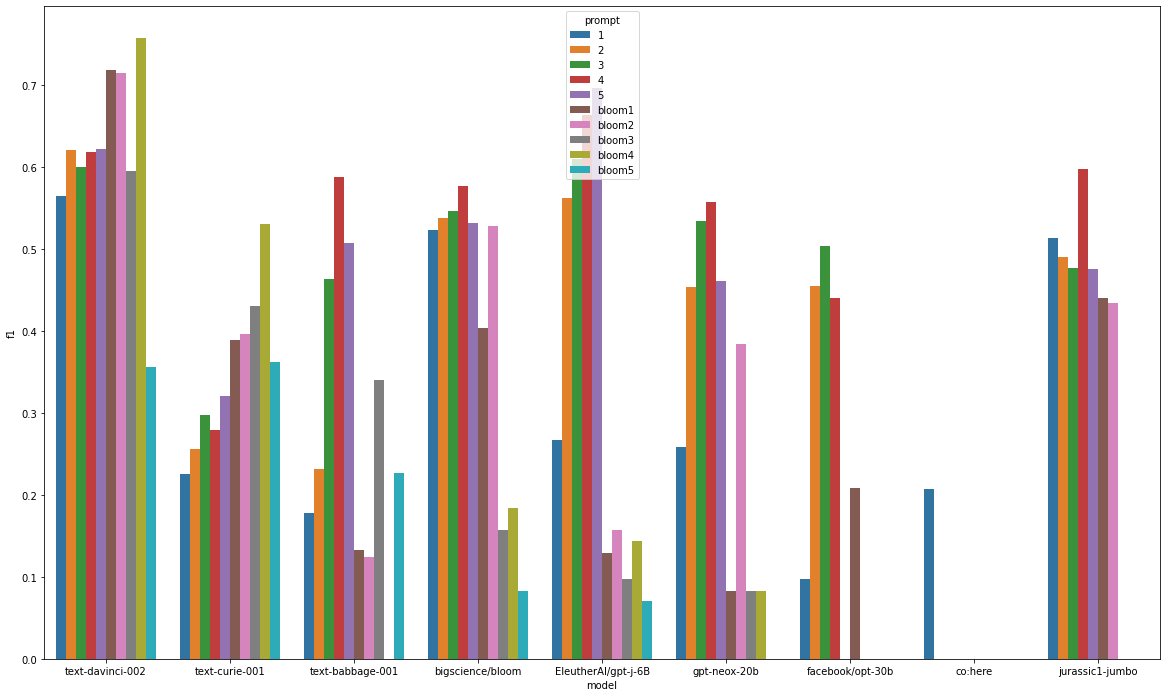

In [136]:
sns.barplot(data=df.loc[df['n_shot']==10], x="model", y="f1", hue="prompt")